In [1]:
import numpy as np
import chebfit as cf
import chebeval as ce
import pickle
import unittest

import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

In [2]:
import pyoorb as oo
import movingObject as mo

# Basic Chebfit example:

In [8]:
BEGIN = -np.pi
END = np.pi
t = np.linspace(BEGIN, END, 4)
x = np.sin(t)
dx = np.cos(t)
p4, resid, rms = cf.chebfit(t, x, dx, nPoly=4)
p8, resid, rms = cf.chebfit(t, x, dx, nPoly=8)

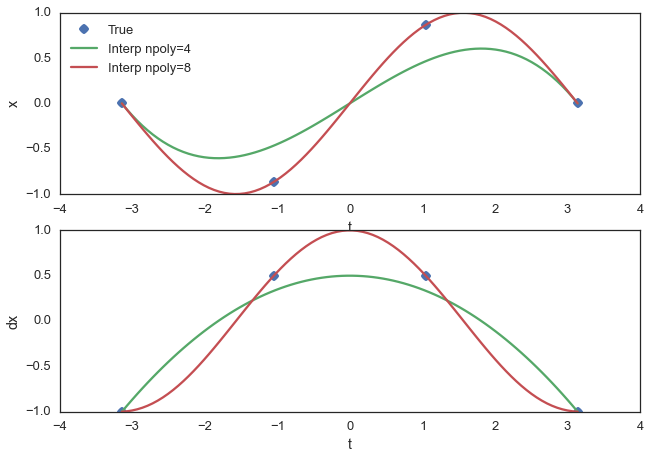

In [9]:
tt = np.linspace(BEGIN, END, 90)
xx4, vv4 = ce.chebeval(tt, p4, interval=(BEGIN, END))
xx8, vv8 = ce.chebeval(tt, p8, interval=(BEGIN, END))
plt.subplot(211)
plt.plot(t, x,'o', label="True")
plt.plot(tt, xx4,'-', label="Interp npoly=4")
plt.plot(tt, xx8,'-', label="Interp npoly=8")
plt.xlabel('t')
plt.ylabel('x')
plt.legend(loc=2)
plt.subplot(212)
plt.plot(t, dx, 'o', label="True")
plt.plot(tt, vv4, '-', label="Interp npoly=4")
plt.plot(tt, vv8, '-', label="Interp npoly=8")
plt.xlabel('t')
plt.ylabel('dx')


Compare to regular chebyshev polynomials:

In [10]:
npp4 = np.polynomial.chebyshev.chebfit(t, x, deg=3)

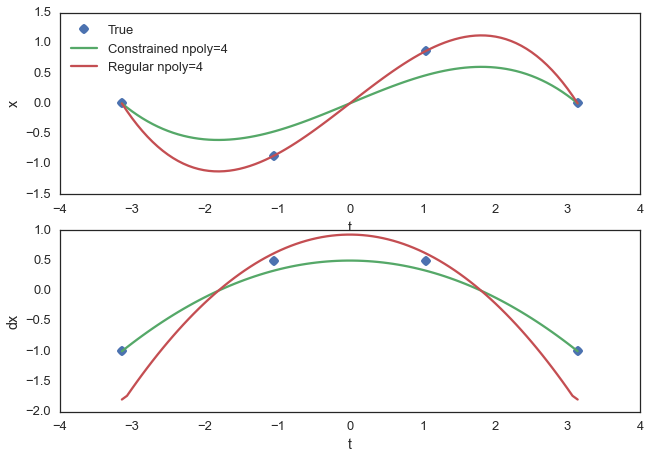

In [11]:

tt = np.linspace(BEGIN, END, 90)
xx4, vv4 = ce.chebeval(tt, p4, interval=(BEGIN, END))
npxx = np.polynomial.chebyshev.chebval(tt, npp4)
plt.subplot(211)
plt.plot(t, x,'o', label="True")
plt.plot(tt, xx4,'-', label="Constrained npoly=4")
plt.plot(tt, npxx,'-', label="Regular npoly=4")
plt.xlabel('t')
plt.ylabel('x')
plt.legend(loc=2)
plt.subplot(212)
plt.plot(t, dx, 'o', label="True")
plt.plot(tt, vv4, '-', label="Constrained npoly=4")
plt.plot(tt, np.gradient(npxx, tt[1]-tt[0]), '-', label="Regular npoly=4")
plt.xlabel('t')
plt.ylabel('dx')

In [12]:
import pandas as pd
dfEphem = pd.read_fwf('galleryephem.dat.gz', compression='gzip')
dfEphem.head()

,#Designation,Code,MJD_UTC/UT1,Delta,RA,Dec,dDelta/dt,dRA/dt,dDec/dt,VMag,...,TOppLat,HEclObj_X,HEclObj_Y,HEclObj_Z,HEclObj_dX/dt,HEclObj_dY/dt,HEclObj_dZ/dt,HEclObsy_X,HEclObsy_Y,HEclObsy_Z
0,236732,807,49354.159303,4.154548,179.011358,2.779615,-0.014208,0.010301,-0.001569,31.938066,...,-0.001141,-4.346831,1.109061,0.156347,-0.003191,-0.00474,-0.000345,-0.197788,0.963229,-0.00002
1,236732,807,49354.159998,4.154539,179.011365,2.779614,-0.014208,0.010285,-0.001568,31.938060,...,-0.001141,-4.346833,1.109058,0.156347,-0.003191,-0.00474,-0.000345,-0.197800,0.963226,-0.00002
2,236732,807,49354.160692,4.154529,179.011372,2.779613,-0.014208,0.010268,-0.001567,31.938055,...,-0.001141,-4.346835,1.109054,0.156347,-0.003191,-0.00474,-0.000345,-0.197812,0.963224,-0.00002
3,236732,807,49354.161387,4.154519,179.011379,2.779612,-0.014208,0.010251,-0.001566,31.938049,...,-0.001141,-4.346837,1.109051,0.156347,-0.003191,-0.00474,-0.000345,-0.197824,0.963222,-0.00002
4,236732,807,49354.162081,4.154509,179.011386,2.779611,-0.014208,0.010235,-0.001565,31.938043,...,-0.001142,-4.346839,1.109048,0.156346,-0.003191,-0.00474,-0.000345,-0.197836,0.963219,-0.00002


In [13]:
np.unique(dfEphem['#Designation'])

array([  236732,   954888,  1590355,  2322771,  3889795,  4733698,
        7168549,  9674309, 10072803])

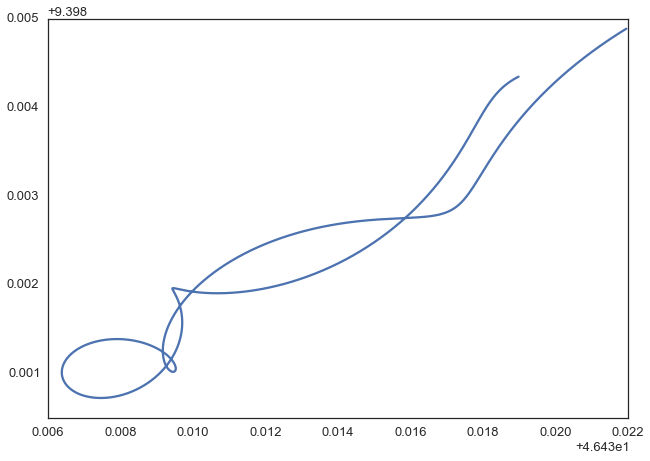

In [14]:
loopyEphem = dfEphem[dfEphem['#Designation']==954888]
plt.plot(loopyEphem.RA, loopyEphem.Dec)

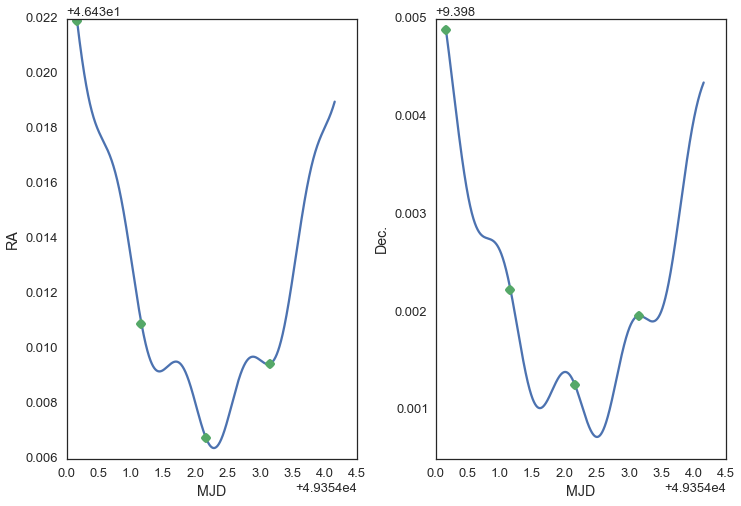

In [15]:
len(dfEphem['MJD_UTC/UT1'][dfEphem['#Designation']==954888])

dayEndPoints = np.array([   2, 1442, 2882, 4322])
plt.subplot(121)
plt.plot(loopyEphem['MJD_UTC/UT1'], loopyEphem.RA)
plt.plot(loopyEphem['MJD_UTC/UT1'][2::1440], 
         loopyEphem.RA[2::1440], 'o')
plt.ylabel('RA')
plt.xlabel('MJD')
plt.subplot(122)
plt.plot(loopyEphem['MJD_UTC/UT1'], loopyEphem.Dec)
plt.plot(loopyEphem['MJD_UTC/UT1'][2::1440], 
         loopyEphem.Dec[2::1440], 'o')
plt.ylabel('Dec.')
plt.xlabel('MJD')
plt.tight_layout()

In [18]:
len(loopyEphem)*2

11522

In [17]:
print 1440/32.
DAYS_PER_OBJECT = 3
ROWS_PER_DAY = 32
COEFF = 14
ephem = loopyEphem[2::45]

45.0


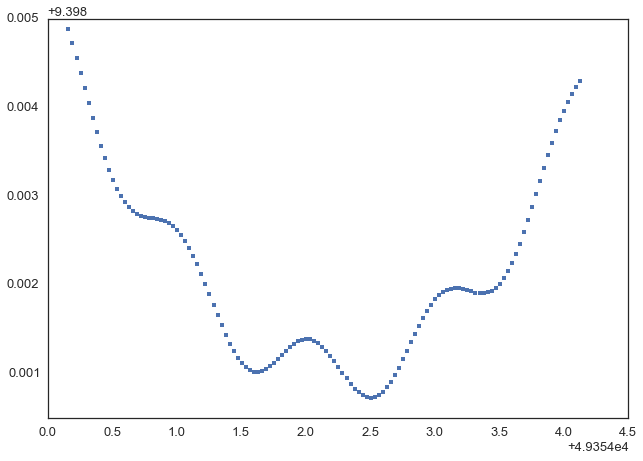

In [127]:
plt.plot(ephem['MJD_UTC/UT1'], ephem.Dec,'.')